In [1]:
library(Seurat)
library(Signac)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)



The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmi

In [ ]:
# filter rna first then 
# add in histone assay with the same cells as the histone
# filter rna for cells in the histone 
# cluster

In [2]:
Sys.time()
H3K27me3_counts_RNA_NEW <- Read10X_h5("/projects/ps-epigen/10x_output/231025_IGM/counts_out/Multiome/QY_2221_1_2_QY_2220_1_2/outs/raw_feature_bc_matrix.h5")
Sys.time()

[1] "2023-11-08 07:32:22 PST"

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' is deprecated; setting repr="T" for you"
'as(<dgTMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "CsparseMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").

Genome matrix has multiple modalities, returning a list of matrices for this genome



[1] "2023-11-08 07:32:35 PST"

In [3]:
H3K27me3_fragpath <- "/projects/ps-epigen/10x_output/231025_IGM/counts_out/Multiome/QY_2221_1_2_QY_2220_1_2/outs/atac_fragments.tsv.gz"
genome.use <- seqlengths(BSgenome.Mmusculus.UCSC.mm10::BSgenome.Mmusculus.UCSC.mm10) 
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79, verbose = F)

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

In [36]:
seqlevels(annotations) <- paste0('chr', seqlevels(annotations))
#Seurat Object for RNA data
H3K27me3_CT_RNA_Multiome <- CreateSeuratObject( counts = H3K27me3_counts_RNA_NEW$`Gene Expression`, assay = "RNA",
 min.features = 1,
  min.cells = 1
)


In [37]:
H3K27me3_CT_RNA_Multiome

An object of class Seurat 
26069 features across 603548 samples within 1 assay 
Active assay: RNA (26069 features, 0 variable features)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



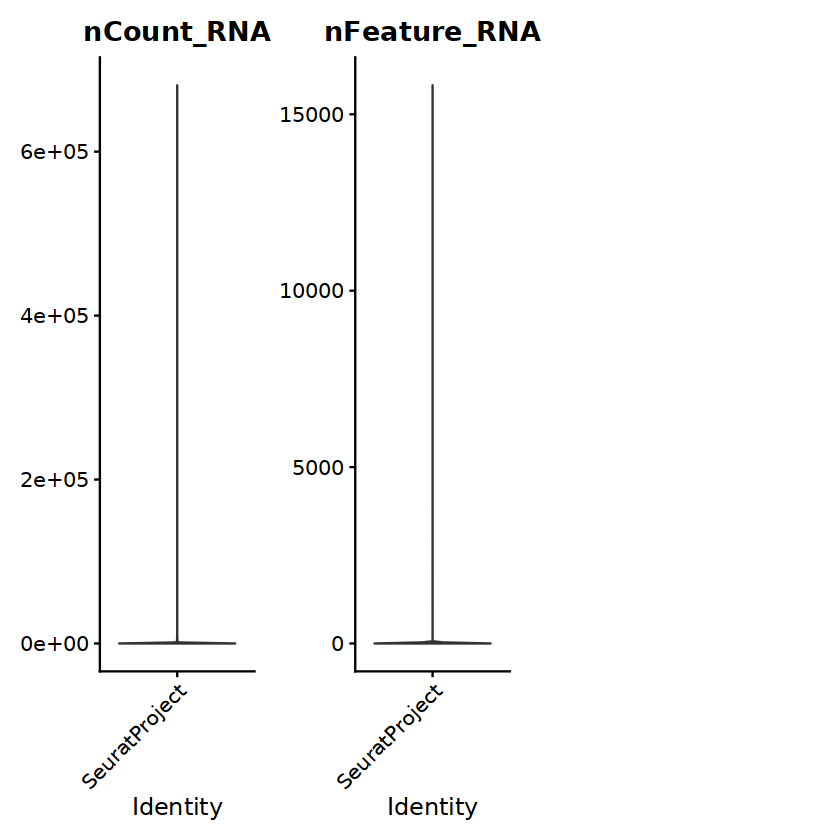

In [38]:
VlnPlot(H3K27me3_CT_RNA_Multiome , c("nCount_RNA", "nFeature_RNA"), ncol = 4,
       pt.size = 0)

In [39]:
H3K27me3_CT_RNA_Multiome[["percent.mt"]] <- PercentageFeatureSet(H3K27me3_CT_RNA_Multiome, pattern = "^mt-", assay = "RNA")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



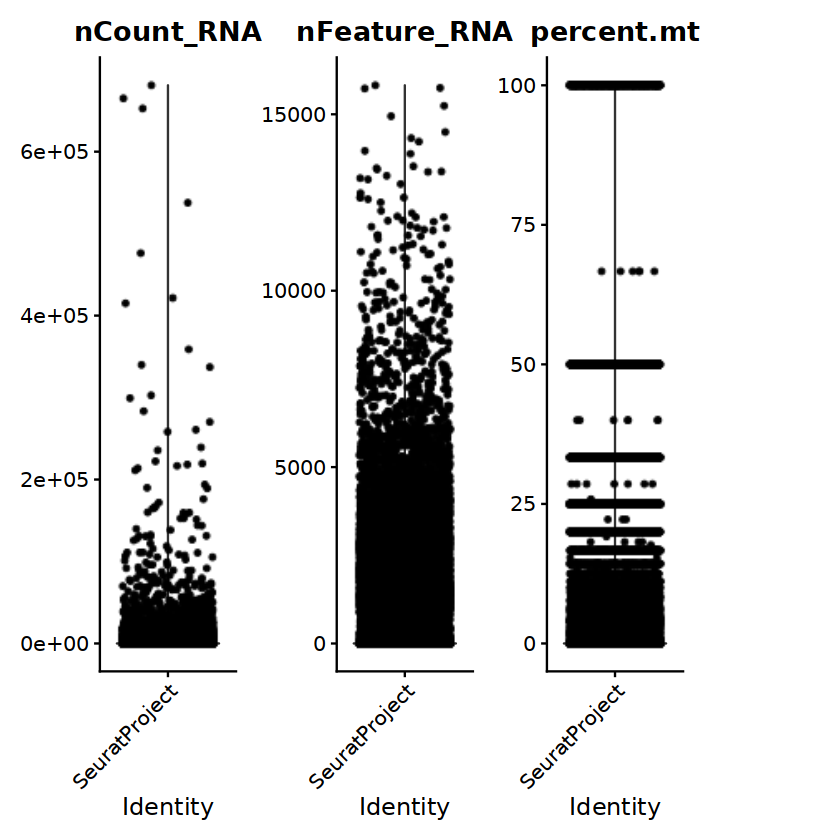

In [40]:
VlnPlot(H3K27me3_CT_RNA_Multiome , c("nCount_RNA", "nFeature_RNA", "percent.mt"), ncol = 4,
       pt.size = 1)

In [42]:
quantile(H3K27me3_CT_RNA_Multiome$nCount_RNA)
quantile(H3K27me3_CT_RNA_Multiome$nFeature_RNA)
quantile(H3K27me3_CT_RNA_Multiome$percent.mt)
# missing values and NaN's not allowed if 'na.rm' is FALSE percent.mt probs due to empty droplets

0%    25%    50%    75%   100% 
     1      1      3      5 680996

0%   25%   50%   75%  100% 
    1     1     3     5 15822

0%  25%  50%  75% 100% 
   0    0    0    0  100

In [41]:
# filter rna first before adding histon
filt_obj_H3K27me3 <- subset(H3K27me3_CT_RNA_Multiome, nCount_RNA > 100
                     & nFeature_RNA > 100 
                     & percent.mt < 10)

In [100]:
filt_obj_H3K27me3 

An object of class Seurat 
49365 features across 12801 samples within 2 assays 
Active assay: RNA (26069 features, 2000 variable features)
 1 other assay present: H3K27me3
 2 dimensional reductions calculated: pca, umap

In [77]:
filt_obj_H3K27me3 [["percent.mt"]] <- PercentageFeatureSet(filt_obj_H3K27me3 , pattern = "^mt-", assay = "RNA")

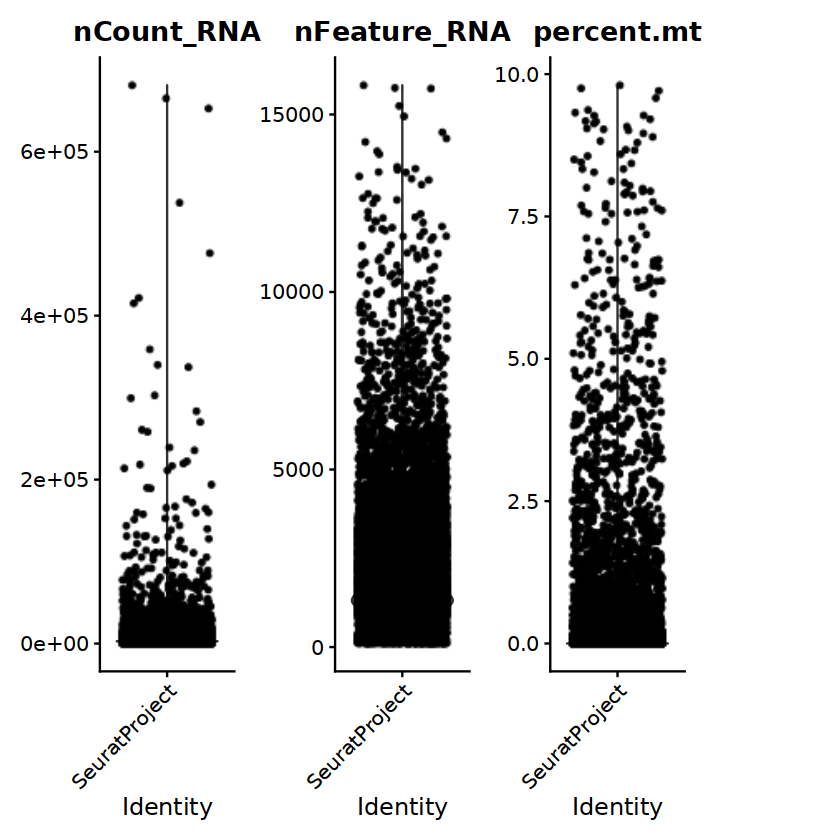

In [78]:
VlnPlot(filt_obj_H3K27me3, c("nCount_RNA", "nFeature_RNA", "percent.mt"), ncol = 4,
       pt.size = 1)

In [44]:
# Cellbarcodes RNA data
# add the atac
H3K27me3_cells_RNA <- colnames(filt_obj_H3K27me3 )

In [45]:
H3K27me3_fragments_Multiome <- CreateFragmentObject(path = H3K27me3_fragpath, cells = H3K27me3_cells_RNA,
                                           verbose = TRUE,validate.fragments = TRUE)

Computing hash



In [46]:
H3K27me3_fragments_Multiome 

A Fragment object for 14219 cells

In [ ]:
raw_obj_H3K27me3[["RNA"]]<- CreateAssayObject(counts = H3K27me3_counts_RNA_NEW$"Gene Expression"[,colnames(raw_obj_H3K27me3)])


In [47]:
cts_pks <- H3K27me3_counts_RNA_NEW$Peaks[,H3K27me3_cells_RNA]
dim(cts_pks)

[1] 25148 14219

In [34]:
H3K27me3_CT_Multiome.assay <- CreateChromatinAssay( counts = cts_pks,
  sep = c(":", "-"),
  min.features = 1,
  min.cells = 1,
  annotation = annotations,
  fragments = H3K27me3_fragpath
)

Computing hash



In [48]:
dim(H3K27me3_CT_Multiome.assay )

[1] 23296 12801

In [49]:
H3K27me3_CT_RNA_Multiome
# 32285 features across 698715samples within 1 assay 


An object of class Seurat 
26069 features across 603548 samples within 1 assay 
Active assay: RNA (26069 features, 0 variable features)

In [50]:
H3K27me3_CT_Multiome.assay


ChromatinAssay data with 23296 features for 12801 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

In [65]:
filt_obj_H3K27me3 

An object of class Seurat 
26069 features across 14219 samples within 1 assay 
Active assay: RNA (26069 features, 0 variable features)

In [70]:
# whats in the rna thats not in the histone
head(setdiff(colnames(filt_obj_H3K27me3 ), colnames(H3K27me3_CT_Multiome.assay)))
length(setdiff(colnames(filt_obj_H3K27me3 ), colnames(H3K27me3_CT_Multiome.assay)))

[1] "AAACATGCAGCTACGT-1" "AAACATGCATACTCCT-1" "AAACCGCGTAACCAGC-1"
[4] "AAACCGCGTTAATGCG-1" "AAACCGGCAGCATGTC-1" "AAACGGATCCTGGCTT-1"

[1] 1418

In [71]:
grep('AAACATGCAGCTACGT-1', rownames(filt_obj_H3K27me3@meta.data))

[1] 11

In [72]:
# this cell isnt present in the histone
grep('AAACATGCAGCTACGT-1', colnames(H3K27me3_CT_Multiome.assay))

integer(0)

In [75]:
head(filt_obj_H3K27me3@meta.data, 11)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<fct>,<dbl>,<int>,<dbl>
AAACAGCCAACATAAG-1,SeuratProject,4471,1835,0.000000000
AAACAGCCAATAACGA-1,SeuratProject,1708,987,0.000000000
AAACAGCCAGAAATGC-1,SeuratProject,24958,6043,0.008013463
AAACAGCCAGCAAGTG-1,SeuratProject,8269,3617,0.024186721
AAACAGCCAGGCTAGA-1,SeuratProject,5997,2735,0.033350008
AAACAGCCAGGTTTGC-1,SeuratProject,7786,2922,0.000000000
AAACAGCCAGTTTACG-1,SeuratProject,2263,1254,0.000000000
AAACAGCCATAAAGCA-1,SeuratProject,1473,892,0.000000000
AAACAGCCATCATGTG-1,SeuratProject,4966,1991,0.020136931


In [64]:
dim(H3K27me3_CT_Multiome.assay)

[1] 23296 12801

In [82]:
# maybe subset the rna for the cells in the histone

filt_obj_H3K27me3 <- subset(filt_obj_H3K27me3, cells = colnames(H3K27me3_CT_Multiome.assay)) 

In [83]:
# now same number of cells as the histone
filt_obj_H3K27me3

An object of class Seurat 
26069 features across 12801 samples within 1 assay 
Active assay: RNA (26069 features, 0 variable features)

In [84]:
# create histone assay and add it to the object
filt_obj_H3K27me3[["H3K27me3"]] <- H3K27me3_CT_Multiome.assay

In [85]:
filt_obj_H3K27me3

An object of class Seurat 
49365 features across 12801 samples within 2 assays 
Active assay: RNA (26069 features, 0 variable features)
 1 other assay present: H3K27me3

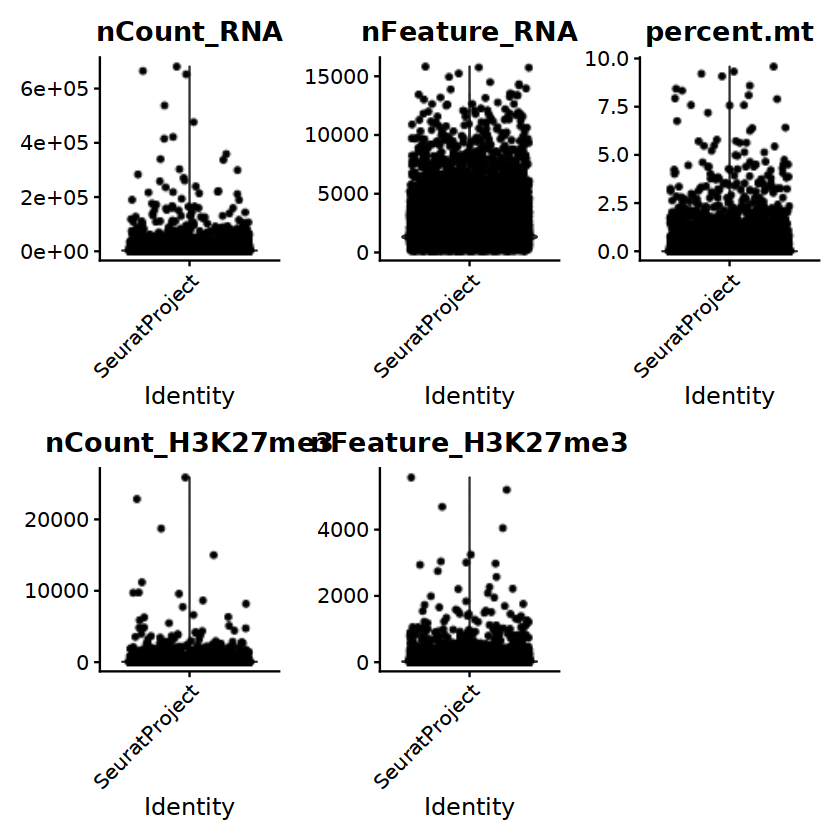

In [87]:
VlnPlot(filt_obj_H3K27me3, c("nCount_RNA", "nFeature_RNA", "percent.mt", "nCount_H3K27me3", "nFeature_H3K27me3"), ncol = 3,
       pt.size = 1)

In [ ]:
# choose not to filter the histone

In [90]:
filt_obj_H3K27me3$library_rna_atac_id <- "QY_2221_1_2_QY_2220_1_2"

In [91]:
head(filt_obj_H3K27me3@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_H3K27me3,nFeature_H3K27me3,library_rna_atac_id
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>
AAACAGCCAACATAAG-1,SeuratProject,4471,1835,0.000000000,33,21,QY_2221_1_2_QY_2220_1_2
AAACAGCCAATAACGA-1,SeuratProject,1708,987,0.000000000,60,35,QY_2221_1_2_QY_2220_1_2
AAACAGCCAGAAATGC-1,SeuratProject,24958,6043,0.008013463,615,294,QY_2221_1_2_QY_2220_1_2
AAACAGCCAGCAAGTG-1,SeuratProject,8269,3617,0.024186721,412,160,QY_2221_1_2_QY_2220_1_2
AAACAGCCAGGCTAGA-1,SeuratProject,5997,2735,0.033350008,179,96,QY_2221_1_2_QY_2220_1_2
AAACAGCCAGGTTTGC-1,SeuratProject,7786,2922,0.000000000,18,9,QY_2221_1_2_QY_2220_1_2


In [92]:
dir.create('/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/04_paired_tag_deepseq_filt_objs/')

In [94]:
Sys.time()
filt_obj_H3K27me3 <- NormalizeData(filt_obj_H3K27me3, normalization.method = "LogNormalize", scale.factor = 10000)
filt_obj_H3K27me3 <- FindVariableFeatures(filt_obj_H3K27me3, selection.method = "vst", nfeatures = 2000)
filt_obj_H3K27me3 <- ScaleData(filt_obj_H3K27me3)
filt_obj_H3K27me3 <- RunPCA(filt_obj_H3K27me3, features = VariableFeatures(object = filt_obj_H3K27me3), verbose = F)
filt_obj_H3K27me3 <- FindNeighbors(filt_obj_H3K27me3, dims = 1:50)
filt_obj_H3K27me3 <- FindClusters(filt_obj_H3K27me3, resolution = 0.5)
filt_obj_H3K27me3 <- RunUMAP(filt_obj_H3K27me3, dims = 1:50, verbose = F)
Sys.time()


[1] "2023-11-08 08:19:54 PST"

Centering and scaling data matrix

PC_ 1 
Positive:  Adgrl3, Ldb2, Pecam1, Aff3, Tspan7, Ptprg, Calcrl, Cyyr1, Pde3a, Itga1 
	   Pitpnc1, Eng, Smad6, Ptprb, Tspan18, Slco2a1, Ace, St6galnac3, Cd93, Ccdc85a 
	   Bmp6, Rnf144a, Acer2, Pcdh17, Cemip2, Fmnl2, Efnb2, Kit, Inpp5d, Epas1 
Negative:  Cfap61, Cfap44, Ccdc30, C230072F16Rik, Ccdc162, Cfap54, Agbl4, Dnah3, Spag17, Lrriq1 
	   Spef2, Ttc29, Rp1, Hydin, Rgs22, Dnah7c, Spag16, Cfap65, Cfap299, Dnah9 
	   Zbbx, Spag6l, Ak9, Stk33, Fhad1, Dnah6, Tmem212, Kif6, Ccdc170, Dnah12 
PC_ 2 
Positive:  Prickle2, Aff3, Ldb2, Adgrl3, Pitpnc1, Pecam1, Calcrl, Cyyr1, Tspan7, Dnah7a 
	   Hydin, T2, Ccdc85a, Tspan18, Cfap65, Cfap46, C230072F16Rik, Pde3a, Ccdc180, Lrguk 
	   Wdr63, Eng, Dnah7c, Dnah9, Kif6, Lrrc36, Ect2l, Spag17, Dnah3, Ccdc30 
Negative:  Sftpb, Dram1, Lamp3, Tmem163, Slc34a2, Hc, Ppp1r14c, Tmem132d, Acoxl, Ank3 
	   Etv5, Gm20629, Arhgef38, Met, Atp6v1c2, Thsd4, Abca3, Tspan11, Slco4c1, Adam19 
	   Aox3, Cxcl15, Kcnj15, Tinag, Klhl2

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12801
Number of edges: 670442

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9393
Number of communities: 27
Elapsed time: 1 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
08:20:06 UMAP embedding parameters a = 0.9922 b = 1.112

08:20:06 Read 12801 rows and found 50 numeric columns

08:20:06 Using Annoy for neighbor search, n_neighbors = 30

08:20:06 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:20:08 Writing NN index file to temp file /scratch/cmiciano/33883267.tscc-mgr7.local/RtmpH1hAc3/file1b9c81f00c052

08:20:08 Searching Annoy index using 1 thread, search_k = 3000

08:20:12 Annoy recall = 100%

08:20:14 Commencing smooth kNN distance calibration u

[1] "2023-11-08 08:20:33 PST"

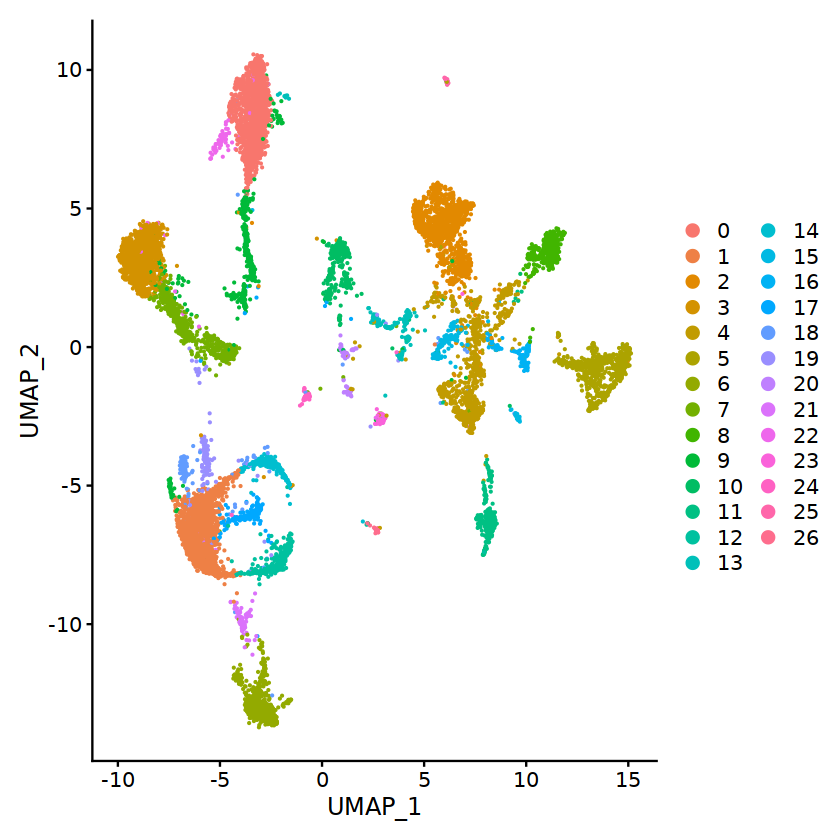

In [96]:
DimPlot(filt_obj_H3K27me3)

In [97]:
Sys.time()
saveRDS(filt_obj_H3K27me3 , "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/04_paired_tag_deepseq_filt_objs/QY_2221_1_2_QY_2220_1_2.RDS")
Sys.time()

[1] "2023-11-08 08:22:37 PST"

[1] "2023-11-08 08:23:15 PST"

In [98]:
filt_obj_H3K27me3 <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/04_paired_tag_deepseq_filt_objs/QY_2221_1_2_QY_2220_1_2.RDS")


In [99]:
filt_obj_H3K27me3

An object of class Seurat 
49365 features across 12801 samples within 2 assays 
Active assay: RNA (26069 features, 2000 variable features)
 1 other assay present: H3K27me3
 2 dimensional reductions calculated: pca, umap

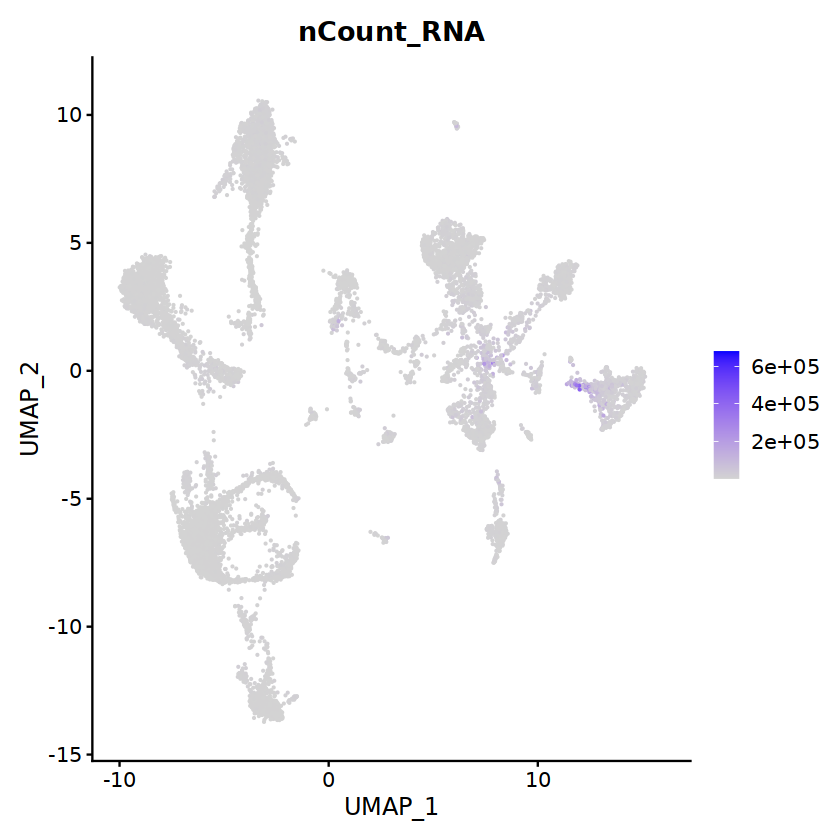

In [101]:
FeaturePlot(filt_obj_H3K27me3, "nCount_RNA")